In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
def loadCombinedArray(cases,field):
    data = np.concatenate([np.load('/kaggle/input/ml-turbulence-dataset/'+dataset+'/'+dataset+'_'+case+'_'+field + '.npy') for case in cases])
    return data

In [4]:
dataset = 'komegasst' 
cases = ['PHLL_case_1p0']

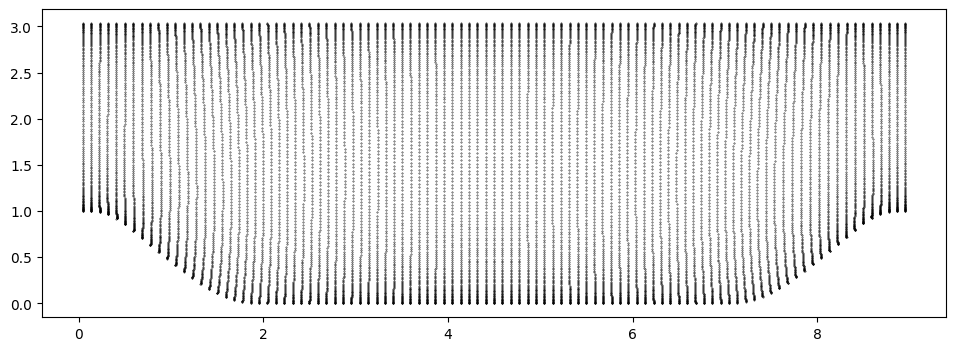

In [5]:
x = loadCombinedArray(cases,'Cx')
y = loadCombinedArray(cases,'Cy')
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)
ax.scatter(x,y,c='k',s=0.1)
ax.set_aspect(1)

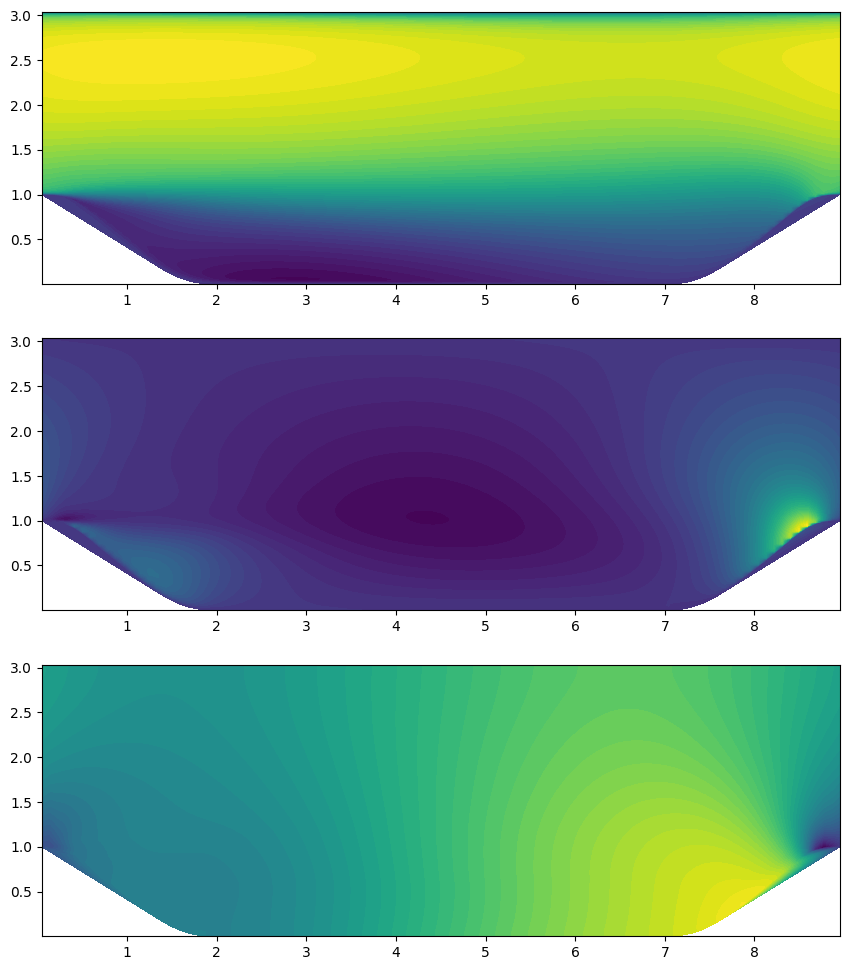

In [6]:
Ux = loadCombinedArray(cases,'Ux')
Uy = loadCombinedArray(cases,'Uy')
p = loadCombinedArray(cases,'p')

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.tricontourf(x,y,Ux,levels=50)
ax1.set_aspect(1)
ax2.tricontourf(x,y,Uy,levels=50)
ax2.set_aspect(1)
ax3.tricontourf(x,y,p,levels=50)
ax3.set_aspect(1)


Dataframe head: 
         Ux            Uy         p
0  0.001589  1.069070e-07 -0.000080
1  0.001582 -5.934680e-08 -0.000078
2  0.001583  1.084560e-07 -0.000075
3  0.001575  9.786830e-08 -0.000072
4  0.001569  1.583580e-07 -0.000069
Dataframe summary: 
                 Ux            Uy             p
count  14751.000000  14751.000000  14751.000000
mean       0.016564      0.000183     -0.000065
std        0.013218      0.001162      0.000048
min       -0.005698     -0.001412     -0.000252
25%        0.001898     -0.000331     -0.000101
50%        0.021129     -0.000024     -0.000069
75%        0.029200      0.000292     -0.000028
max        0.032573      0.008673      0.000042
Dataframe histograms: 


array([[<Axes: title={'center': 'Ux'}>, <Axes: title={'center': 'Uy'}>],
       [<Axes: title={'center': 'p'}>, <Axes: >]], dtype=object)

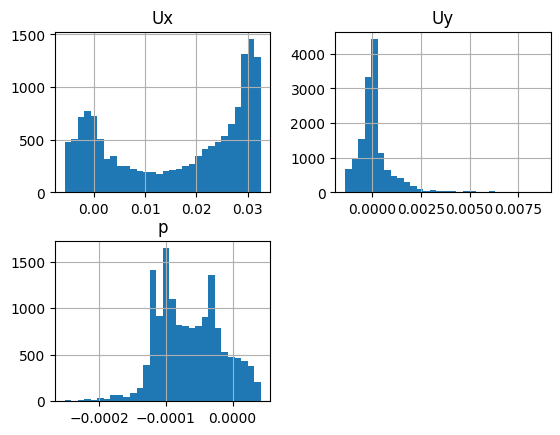

In [7]:
from sklearn import preprocessing
import pandas as pd

data_combined = np.column_stack((Ux,Uy,p))
df = pd.DataFrame(data=data_combined)
df.columns=['Ux','Uy','p']
print('Dataframe head: ')
print(df.head())
print('Dataframe summary: ')
print(df.describe())
print('Dataframe histograms: ')
df.hist(bins=30)

In [8]:
import tensorflow as tf
from tensorflow import keras
keras.backend.clear_session()

#The model has two inputs: Ux,Uy
input_layer = keras.layers.Input(shape=(2),name ='input_layer')

#Hidden layer definition
hidden1 = keras.layers.Dense(20,name='Hidden1', kernel_initializer="lecun_normal", activation = "selu")(input_layer)
hidden2 = keras.layers.Dense(20,name='Hidden2', kernel_initializer="lecun_normal", activation = "selu")(hidden1)
hidden3 = keras.layers.Dense(20,name='Hidden3', kernel_initializer="lecun_normal", activation = "selu")(hidden2)
hidden4 = keras.layers.Dense(20,name='Hidden4', kernel_initializer="lecun_normal", activation = "selu")(hidden3)
hidden5 = keras.layers.Dense(20,name='Hidden5', kernel_initializer="lecun_normal", activation = "selu")(hidden4)

output_layer = keras.layers.Dense(1,name='output_layer')(hidden5)

model=keras.Model(inputs=[input_layer], outputs=[output_layer])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 2)]               0         
                                                                 
 Hidden1 (Dense)             (None, 20)                60        
                                                                 
 Hidden2 (Dense)             (None, 20)                420       
                                                                 
 Hidden3 (Dense)             (None, 20)                420       
                                                                 
 Hidden4 (Dense)             (None, 20)                420       
                                                                 
 Hidden5 (Dense)             (None, 20)                420       
                                                                 
 output_layer (Dense)        (None, 1)                 21    

array([[<Axes: title={'center': 'p'}>]], dtype=object)

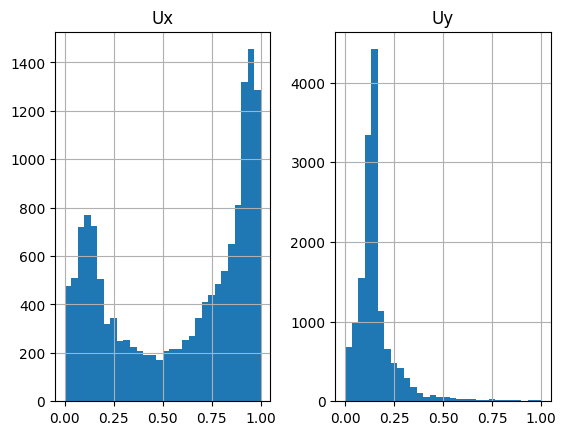

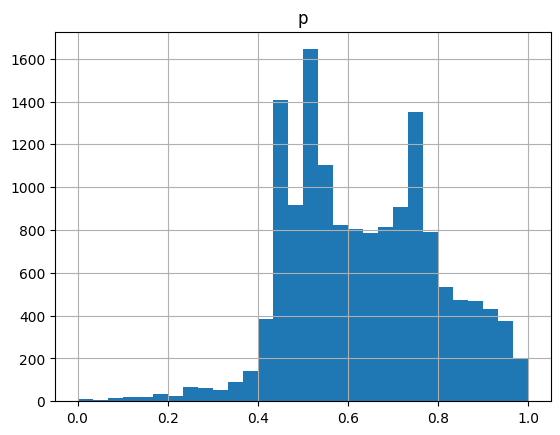

In [10]:
df_features = df[['Ux','Uy']]
df_labels = df['p']

scaler_features = preprocessing.MinMaxScaler()
scaler_labels = preprocessing.MinMaxScaler()

df_features = pd.DataFrame(scaler_features.fit_transform(df_features), columns = ['Ux','Uy'])
df_labels = pd.DataFrame(scaler_labels.fit_transform(df_labels.values.reshape(-1,1)), columns = ['p'])

df_features.hist(bins=30)
df_labels.hist(bins=30)

In [11]:
optimizer = tf.keras.optimizers.Nadam(learning_rate = 5E-4)
model.compile(optimizer,loss='mse',metrics=['mae', 'mse'])

history = model.fit([df_features], df_labels, 
                    epochs=100, 
                    verbose=1, 
                   )

Epoch 1/100
461/461 [==============================] - 4s 3ms/step - loss: 0.0709 - mae: 0.1631 - mse: 0.0709
Epoch 2/100
461/461 [==============================] - 1s 3ms/step - loss: 0.0227 - mae: 0.1231 - mse: 0.0227
Epoch 3/100
461/461 [==============================] - 1s 3ms/step - loss: 0.0222 - mae: 0.1219 - mse: 0.0222
Epoch 4/100
461/461 [==============================] - 1s 3ms/step - loss: 0.0219 - mae: 0.1209 - mse: 0.0219
Epoch 5/100
461/461 [==============================] - 1s 3ms/step - loss: 0.0216 - mae: 0.1199 - mse: 0.0216
Epoch 6/100
461/461 [==============================] - 1s 3ms/step - loss: 0.0213 - mae: 0.1188 - mse: 0.0213
Epoch 7/100
461/461 [==============================] - 1s 3ms/step - loss: 0.0211 - mae: 0.1180 - mse: 0.0211
Epoch 8/100
461/461 [==============================] - 1s 3ms/step - loss: 0.0209 - mae: 0.1171 - mse: 0.0209
Epoch 9/100
461/461 [==============================] - 1s 3ms/step - loss: 0.0208 - mae: 0.1165 - mse: 0.0208
Epoch 10/1

461/461 [==============================] - 1s 2ms/step


Text(0.5, 1.0, 'Truth')

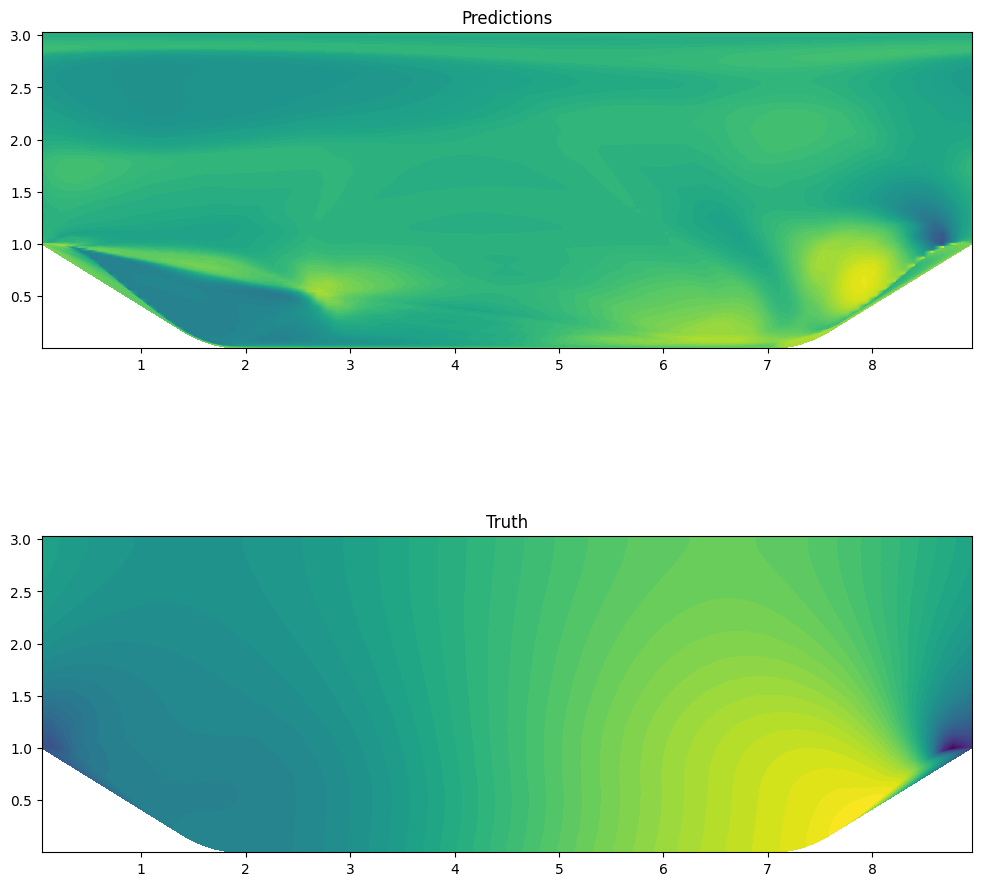

In [12]:
predictions = model.predict(df_features).reshape(len(df_features))
truth = df_labels['p']

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.tricontourf(x,y,predictions,levels=50,vmin=0,vmax=1)
ax1.set_aspect(1)
ax1.set_title('Predictions')
ax2.tricontourf(x,y,truth,levels=50,vmin=0,vmax=1)
ax2.set_aspect(1)
ax2.set_title('Truth')